# 1- BUSINESS UNDERSTANDING
The Seattle AirBnB Dataset contains data about AirBnB listings in Seattle, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the following business questions.

**Pricing Trends**

1. How does pricing increase or decrease by season and what is the peak season in Seattle?

2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?

3. How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?


**Sentiment Analysis of Reviews**

1. How can we categorize reviews based on sentiments?

2. Can we map positive and negative sentiments from reviews to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale?

3. Can we explore some of the worst reviews for additional insights?


**Price Prediction**

Can we predict price for a given listing? What factors of the listing correlate best for predicting price?

Pricing trend related questions can help understand peak seasons and neighborhood in Seattle and can allow AirBnB to regulate inventory accordingly. It can also help with targeting more effective marketing campaigns.

Sentiment analysis of reviews can give AirBnB insight into brand affinity and gauge consumer interest. In addition, associating the sentiments with neighborhoods can detect problematic neighborhoods.

Price prediction can help understand what factors mostly correlate with price. This is helpful so these features can be top of mind for AirBnB as well as AirBnB hosts.

# 2- DATA UNDERSTANDING

## Let's look at the data

As a first step, I will be reading the 3 files part of the Seattle AirBnB dataset and exploring each of the datasets a bit.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from IPython import display

# 2.1 Read data set and explore it carefully

there is **three** files for this project

1. Calender
2. listings
3. reviewes

In [2]:
SeatleCalender =pd.read_csv(r"E:\udacity data science nanodegree\seattle\calendar.csv")
SeatleCalender.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [3]:
SeatleCalender.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [4]:
SeatleListings= pd.read_csv(r"E:\udacity data science nanodegree\seattle\listings.csv")
SeatleListings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
SeatleReviews= pd.read_csv(r"E:\udacity data science nanodegree\seattle\reviews.csv")
SeatleReviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
SeatleReviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


# 2.1.0 CALENDAR Data Set

Let's explore the Calendar data set first. We wil be looking at its charactristics as:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [7]:
# Print rows and columns in calendar data set
print("Number of rows in SeatleCalender are {} and number of columns are {}".format(SeatleCalender.shape[0],SeatleCalender.shape[1]))

Number of rows in SeatleCalender are 1393570 and number of columns are 4


In [8]:
# Assess null values
print(SeatleCalender.isnull().sum())

listing_id         0
date               0
available          0
price         459028
dtype: int64


In [9]:
# Describe to get a brief summary about dataset min,max,interquartile and so on
print(SeatleCalender.describe(include='all'))

          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-01-30         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


**FINDINGS**

Based on the previous exploration, it seems like there will be little data preprocessing required to use this dataset. The only missing values are in the price column which could be just due to the fact that the listing is unavailable for those days.

# Visualize Seasonal Pattern in Seatle

In [10]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

In [11]:
def timeplot(data, feat, title):
    """
    draw a smooth line for the time series of feature
    """
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    # smooth y for visualization
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation =90)
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

## Seasonal Booking

In [12]:
SeatleCalender['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [13]:
SeatleCalender['available_bool']=SeatleCalender['available'].map(lambda available:1 if available == 't' else 0)

In [14]:
SeatleCalender.head()

,listing_id,date,available,price,available_bool
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,0
3,241032,2016-01-07,f,NaN,0
4,241032,2016-01-08,f,NaN,0


In [15]:
#check new values 

SeatleCalender['available_bool'].value_counts()

1    934542
0    459028
Name: available_bool, dtype: int64

In [16]:
Seatle_occupancy_by_date = SeatleCalender[['date', 'available_bool']].groupby('date').mean()
Seatle_occupancy_by_date['occupancy'] = 1 - Seatle_occupancy_by_date['available_bool']
Seatle_occupancy_by_date.head()

,available_bool,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263


In [17]:
#to avoid some performance issues 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

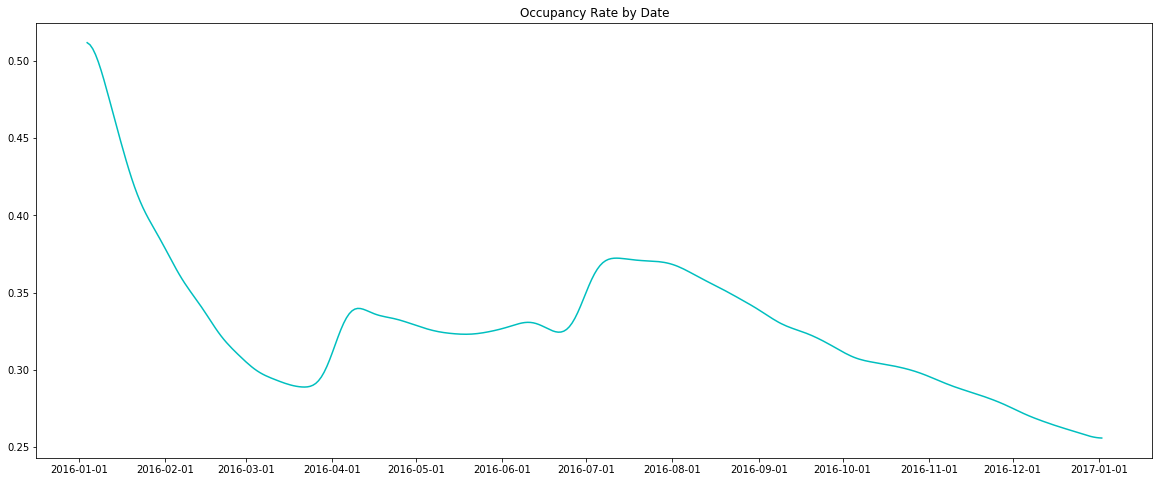

In [18]:
timeplot(Seatle_occupancy_by_date, 'occupancy', 'Occupancy Rate by Date')


**Finidings**

The highest occupancy rate is in **January 2016**, and decreasing rapidly from **50% to 30% in 2 months**. Then, it goes up slightly in the start of **April** and in the **start of July separately**. After that, it **declines continuously.**

It seems that **spring and summer** are the busy season. The best weather in Seattle is from late June to early September. And, in fact, there is a peak during that time.

However, it is weird to see the highest occupancy rate is in January 2016. It might be because any festivals. Or did the hotels change their price strategy to become more competitive? I don't know why.

## Which are Airbnb popular homes in seatlee

In [19]:
Seatle_occupancy_by_listing = SeatleCalender[['listing_id', 'available_bool']].groupby('listing_id').mean()
Seatle_occupancy_by_listing['occupancy'] = 1 - Seatle_occupancy_by_listing['available_bool']
Seatle_occupancy_by_listing.drop(['available_bool'], axis = 1, inplace=True)
Seatle_occupancy_by_listing['id'] = Seatle_occupancy_by_listing.index

In [20]:
Seatle_occupancy_by_listing=Seatle_occupancy_by_listing.sort_values(by= 'occupancy',ascending=False).drop("id", axis = 1)

In [21]:
Seatle_occupancy_by_listing.index.rename('id',inplace=True)

In [22]:
Seatle_occupancy_by_listing.head()

,occupancy
id,
5308339,1.0
4211836,1.0
9939359,1.0
2426152,1.0
4030600,1.0


In [23]:
SeatleListings2=SeatleListings[['id','name']].set_index('id')
SeatleListings2.head()

,name
id,
241032,Stylish Queen Anne Apartment
953595,Bright & Airy Queen Anne Apartment
3308979,New Modern House-Amazing water view
7421966,Queen Anne Chateau
278830,Charming craftsman 3 bdm house


In [24]:
Seatle_occupancy_by_listing2=Seatle_occupancy_by_listing.merge(SeatleListings2, how='inner',left_on='id',right_on='id')

In [25]:
Seatle_occupancy_by_listing2[Seatle_occupancy_by_listing2['occupancy']==1]

,occupancy,name
id,,
5308339,1.0,Room w/ full bathroom & entrance
4211836,1.0,Steps from Greenlake!
9939359,1.0,Capitol Hill Studio Apartment
2426152,1.0,Spacious North Seattle Condo!
4030600,1.0,Bright and Lovely Guest Room
8339428,1.0,Cap Hill Apartment - Prime Location
8811945,1.0,Queen Anne Bungalow - Weekly Rental
7437784,1.0,Cozy Private Home near the Lake #2
9975073,1.0,Just steps to Downtown




# 2.1.1 LISTINGS Data Set

Next, let's explore the Listings data set. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column
4. Explore some of the categorical features

In [26]:
# Print rows and columns in Listings data set
print("Number of rows in SeatleCaListings are {} and number of columns are {}".format(SeatleListings.shape[0],SeatleListings.shape[1]))

Number of rows in SeatleCaListings are 3818 and number of columns are 92


In [27]:
# Assess null values
print(SeatleListings.isnull().sum())

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [28]:
SeatleListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

## 2.1.1.0 Exploring categrorical features

In [29]:
# Explore Categorical Feature - experiences_offered
print('Value counts for experiences_offered: ', SeatleListings['experiences_offered'].value_counts())

Value counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


In [30]:
# Explore Categorical Feature - host_location
print('Value counts for host_location: ', SeatleListings['host_location'].value_counts())

Value counts for host_location:  Seattle, Washington, United States                             3259
US                                                              246
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           13
Bellevue, Washington, United States                              12
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Vashon, Washington, United States                                 5
Shoreline, Washington, United States                              5
Sammamish, Washington, United States                              5
Seattle                                                           5
Portland, Orego



**FINDINGS**

The experiences offered are **None** for all rows. The host_location column can use some standardization if we are to use it for analysis. For example: **"Seattle, Washington, United States", "Seattle" and "Seattle, Washington"** should be considered as the same.

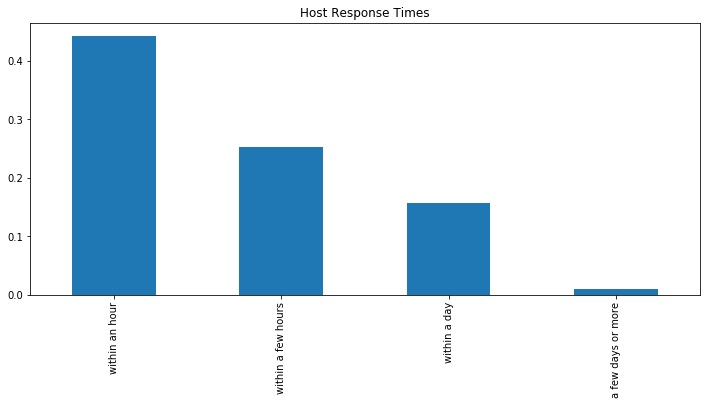

In [31]:
# Explore Categorical Feature - host_response_time

host_response_vals = SeatleListings['host_response_time'].value_counts()
(host_response_vals/SeatleListings.shape[0]).plot(kind="bar",figsize=(12,5));
plt.title("Host Response Times");
plt.xticks(rotation = 90);




**FINDINGS**

it seems a good response time about **40%** response within one hour and it's downward trend

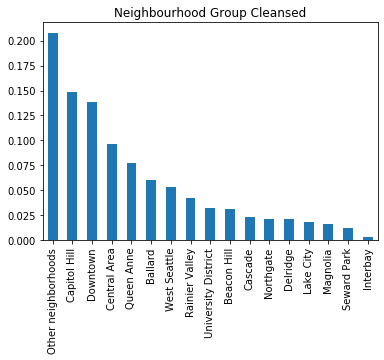

In [32]:
# Explore Categorical Feature - neighborhood_group_cleansed

neigh_vals = SeatleListings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/SeatleListings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");
plt.xticks(rotation = 90);

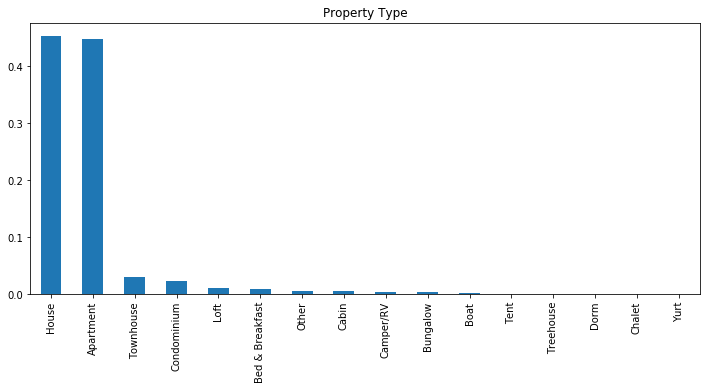

In [33]:
# Explore Categorical Feature - property_type

proparty_vals = SeatleListings['property_type'].value_counts()
(proparty_vals/SeatleListings.shape[0]).plot(kind="bar",figsize=(12,5));
plt.title("Property Type");
plt.xticks(rotation = 90);


**FINDINGS**

It's good to know that apartments and houses dominate the listings data set. We can focus on these if needed for any of our analysis.

# 2.1.2 Reviewes Dataset Exploration

let's explore the Reviews data set. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [34]:
# Print rows and columns in Reviews data set
print("Number of rows in SeatleReviews are {} and number of columns are {} : ".format(SeatleReviews.shape[0],SeatleReviews.shape[1]))

Number of rows in SeatleReviews are 84849 and number of columns are 6 : 


In [35]:
# Assess null values
print(SeatleReviews.isnull().sum())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [36]:
# Describe to get a quick look at our data stats
print(SeatleReviews.describe(include='all'))

          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN  2.762402e+07           NaN   
max     1.024814e+07  5.873651e+07         NaN  5.281274e+07           NaN   

                                                 comments  
cou

# 3. DATA PREPARATION

## Question 1 - PRICE ANALYSIS
**1.** Understand price increases/decreases by season and detect peak season in Seattle

**2.** Understand price increases/decreases by neighborhood and detect pricey neighborhoods in Seattle

**3.** Understand how property types within neighborhoods impact price for a handful of neighborhoods and property types



In [37]:
# First we need to extract the year and month part of date column in SeatelCalender

SeatleCalender['year'] = pd.DatetimeIndex(SeatleCalender['date']).year
SeatleCalender['month'] = pd.DatetimeIndex(SeatleCalender['date']).month

# to calculate the average for the price we need first to convert it into a numerical values as it is object in the dataset
SeatleCalender['price'] = SeatleCalender['price'].str.replace('$', '').str.replace(',','').astype('float')


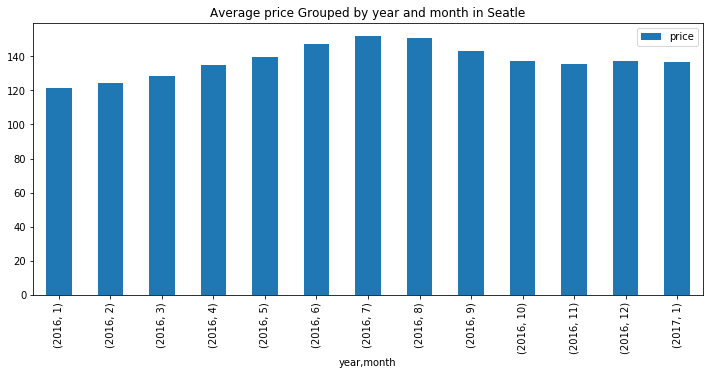

In [38]:
SeatleCalender.groupby(['year','month'])[['price']].mean().plot(kind="bar",figsize=(12,5));
plt.title("Average price Grouped by year and month in Seatle");
plt.xticks(rotation = 90);


**FINDINGS**

Based on the above chart, it shows that June through August are the peak months, with July being the highest. A quick Google search (https://santorinidave.com/best-time-to-visit-seattle) and this link also (https://www.tripsavvy.com/the-best-time-to-visit-seattle-4175385) confirms my assumption that these months have the best weather in Seattle with summer in full swing and low chances of rain.

Also, it seems like the year starts slow, with January having the lowest average price. Towards Spring and the holiday season, prices start to pick back up a little around Apr/May and Nov/Dec respectively.

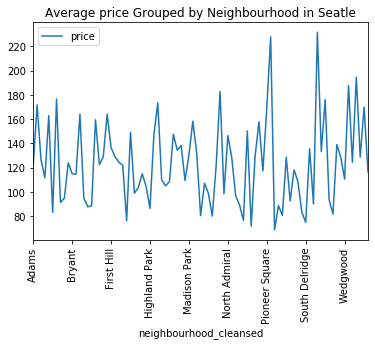

In [39]:
#plot average price for each neighbourhood
SeatleListings['price'] = SeatleListings['price'].replace('[\$,]', '', regex=True).astype(float)

SeatleListings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();
plt.title("Average price Grouped by Neighbourhood in Seatle");
plt.xticks(rotation = 90);

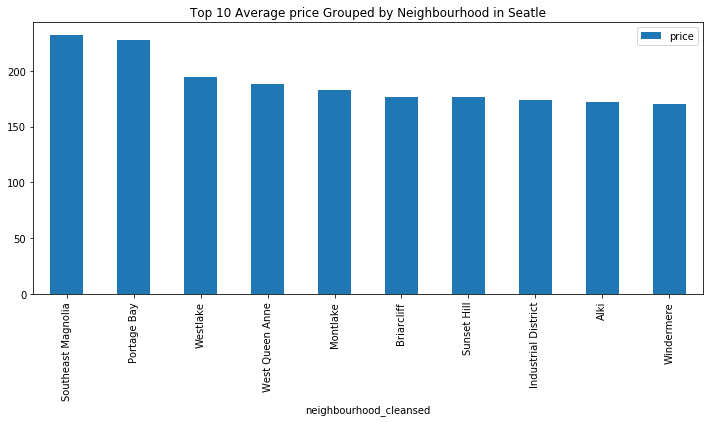

In [40]:
# Plot top 10 neighborhoods

top_10_neighbourhood = SeatleListings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head(10)
top_10_neighbourhood.plot(kind='bar',figsize=(12,5));
plt.title("Top 10 Average price Grouped by Neighbourhood in Seatle");
plt.xticks(rotation = 90);

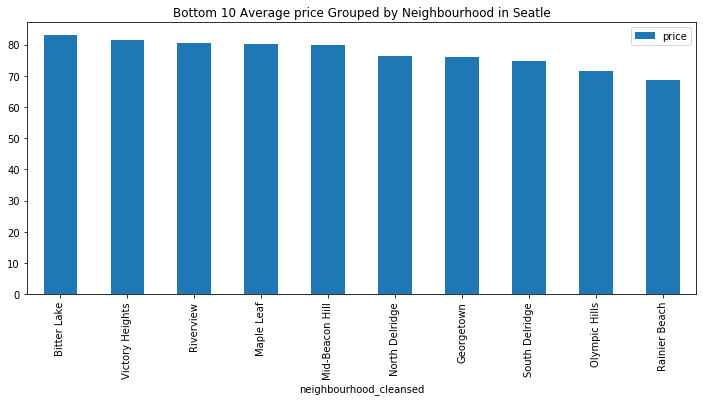

In [41]:
# Plot bottom 10 neighborhoods

bottom_10_neighbourhood = SeatleListings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail(10)
bottom_10_neighbourhood.plot(kind='bar',figsize=(12,5));
plt.title("Bottom 10 Average price Grouped by Neighbourhood in Seatle");
plt.xticks(rotation = 90);


**FINDINGS**

Based on the above analysis, there is definitely price fluctuations based on neighborhoods. The Southeast Magnolia neighborhood seems like the priciest of all, averaging at **$231**.

Followed by Portage Bay at **$227**.

Rainier Beach seems like the cheapest at **$68** average price.

In [42]:
# Explore property types within neighborhoods and how they impact price
# Focus on the top 5 expensive Neighborhoods from above - Southeast Magnolia, Portage Bay, Westlake, West Queen Anne and Montlake
# Focus on property types - House and Apartment

values_high_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
interting_prop = ('Apartment','House')
top_neighbourhood = SeatleListings.loc[SeatleListings['neighbourhood_cleansed'].isin(values_high_neigh)]
top_neighbourhood_interting_prop = top_neighbourhood.loc[SeatleListings['property_type'].isin(interting_prop)]

top_neighbourhood_prop_grouped =top_neighbourhood_interting_prop.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
top_neighbourhood_prop_grouped

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [43]:
price_arr =top_neighbourhood_prop_grouped['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

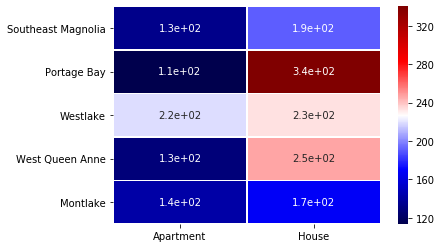

In [44]:
# we will plot a heat map to find proportion of prices by neighbourhood and proparty type 

indx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=indx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='seismic', linewidths=0.5, annot=True);



**FINDINGS**

We focused on the top 5 expensive neighbourhoods from the above analysis as well as Houses and Apartments mostly since based on the previous analysis, we know they make up a good percentage of property types.

Based on the above, we can see that Houses in Portage Bay are the most expensive followed by Houses in West Queen Anne and Westlake. It is interesting to note that in Westlake, both Houses and Apartments can be found at approx. the same price.

# Question 2 - SENTIMENT ANALYSIS OF REVIEWS


**1.** Understand positive and negative sentiments from review comments

**2.** Map the positive and negative sentiments to neighborhoods to understand which neighborhoods rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale

**3.** Explore some of the worst reviews

In [45]:
# Create a smaller data frame with just listing ids and review comments
SeatleReviews_Comments = SeatleReviews[['listing_id', 'comments']].copy()
SeatleReviews_Comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [46]:
# Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
# Initially, I tried with the neighbourhood field in the listings dataset,
#but found that some values were blank, so I used neighbourhood_cleansed field


def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the SeatleListings data set
    
    INPUT:
    listing_id - listing_id field for a particular listing
    
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = SeatleListings.loc[SeatleListings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    
    return neighbourhood

# Test function
get_neighborhood(241032)

'West Queen Anne'

In [47]:
# Apply get_neighborhood function to the listing ids

SeatleReviews_Comments['neighbourhood'] = SeatleReviews_Comments['listing_id'].apply(get_neighborhood)
SeatleReviews_Comments.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [48]:
# Check to see if any listing ids don't have neighborhoods associated
SeatleReviews_Comments['neighbourhood'].isnull().sum()

0

In [49]:
# SentimentIntensityAnalyzer reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


SeatleReviews_Comments['polarity_score'] =SeatleReviews_Comments['comments'].apply(sentiment_analyzer_scores)
SeatleReviews_Comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [50]:
# Print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: ',SeatleReviews_Comments['polarity_score'][SeatleReviews_Comments['polarity_score'] > 0].count())
print('Negative compound scores: ',SeatleReviews_Comments['polarity_score'][SeatleReviews_Comments['polarity_score'] < 0].count())
print('Neutral compound scores: ',SeatleReviews_Comments['polarity_score'][SeatleReviews_Comments['polarity_score'] == 0].count())

Positive compound scores:  82444
Negative compound scores:  849
Neutral compound scores:  1556


In [51]:
# Group by neighbourhood and average the polarity scores

neigh_polarity = SeatleReviews_Comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)
neigh_polarity.head()

,polarity_score
neighbourhood,
Roxhill,0.946186
Cedar Park,0.940441
Pinehurst,0.939010
Arbor Heights,0.937228
Windermere,0.935011


In [52]:
neigh_polarity.tail()

,polarity_score
neighbourhood,
Mid-Beacon Hill,0.842078
South Beacon Hill,0.835181
University District,0.812145
Holly Park,0.802386
View Ridge,0.796942


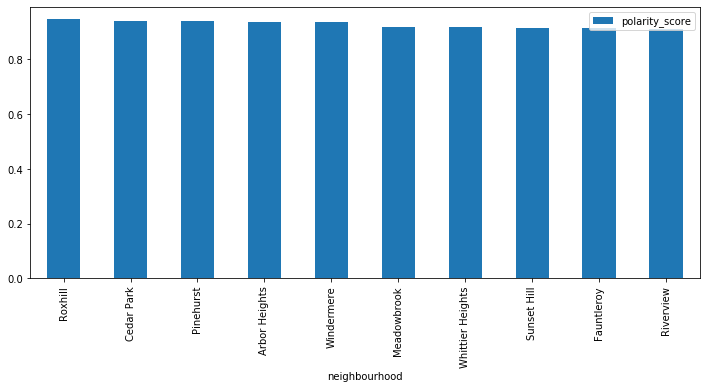

In [53]:
# Visualize top neighborhoods based on reviews

neigh_polarity.head(10).plot(kind='bar',figsize=(12,5));

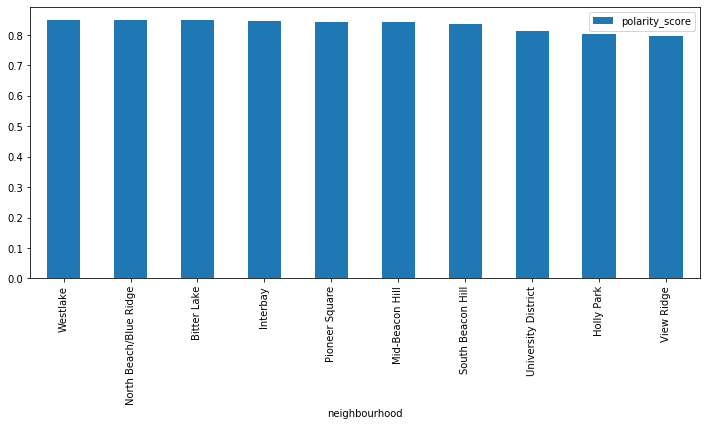

In [54]:
# Visualize bottom 10 neighborhoods based on reviews

neigh_polarity.tail(10).plot(kind='bar',figsize=(12,5));



**FINDINGS**

**Roxhill, Cedar Park and Pinehurst** are some of the neighborhoods that have top reviews. Relatively, the lower ranking neighborhoods are **University District, Holly Park and View Ridge**

In [55]:
# Explore the worst reviews
SeatleReviews_Comments.sort_values(by='polarity_score',ascending=False).tail(20)

,listing_id,comments,neighbourhood,polarity_score
75338,1593991,Wir haben und bei Stan und Carrie rundrum wohl...,North Beach/Blue Ridge,-0.9823
55356,86185,"Jane hat dafür gesorgt, dass wir uns sehr wohl...",North Admiral,-0.9823
25870,3333971,Die Appartements von Darcy liegen sehr gut ze...,Pioneer Square,-0.9828
26213,4814811,Cameron und seine Mitbewohner waren super Gast...,Minor,-0.9828
71767,4668327,We were very disappointed in our stay with Bri...,North Beacon Hill,-0.9833
43527,9183838,Unfortunately my experience with the Belltown ...,Belltown,-0.9863
24224,4752817,Die Wohnung war bei Übernahme perfekt sauber. ...,First Hill,-0.9864
65646,841274,Wir haben die 16 Tage bei Jill sehr genossen. ...,Mount Baker,-0.9866
68659,9519968,Do NOT rent this house if you are not the clea...,Montlake,-0.9868
3890,6245498,Der Bungalow von Kevin bietet alle Annehmlichk...,Whittier Heights,-0.9880



**FINDINGS**

It is interesting to see that most of the reviews that were rated badly on the polarity score seem to be in **DEUTSCH** ! Perhaps this is a limitation of the Sentiment Intensity Analyzer.

The other 3 reviews seem to be genuinely bad, with users complaining about the lack of A/C and fans, host being rude, construction noise ruining people's stay, poor condition of the place etc.

In [56]:
# Check if price has missing values, if it does, we want to remove those records from the dataset

SeatleListings['price'].isnull().sum()

0


**FINDINGS**

All records in the listings dataset have price information available to use.

Based on the field definitions, there are some columns that seem less likely to impact price, so we will drop these from the dataset in order to work with a cleaner and smaller dataset. The reasons for dropping these fields are mostly:

ID field or meta data associated with the listing

Other fields that capture **same/similar information** (eg: using country code and dropping country)

**Dropping very granular** fields such as street, zipcode, latitude, longitude etc. and keeping the analysis at the city level

The columns we will be dropping are: id ,listing_url ,scrape_id ,last_scraped ,thumbnail_url, medium_url ,xl_picture_url, 

host_id,host_url, host_thumbnail_url, host_verifications, street, neighbourhood, neighbourhood_group_cleansed ,zipcode, 

smart_location,country, latitude, longitude, weekly_price, monthly_price, calendar_updated, 

calendar_last_scraped,first_review,last_review, calculated_host_listings_count,reviews_per_month

In [57]:
SeatleListings.shape

(3818, 92)

In [58]:
# Drop columns that are less likely to have an impact on price

SeatleListings_modified = SeatleListings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped',
                    'thumbnail_url','medium_url','xl_picture_url','host_id',
                    'host_url','host_thumbnail_url','host_verifications',
                    'street','neighbourhood','neighbourhood_group_cleansed',
                    'zipcode','smart_location','country','latitude','longitude',
                    'weekly_price','monthly_price','calendar_updated','calendar_last_scraped',
                    'first_review','last_review','calculated_host_listings_count','reviews_per_month']
SeatleListings_modified = SeatleListings.drop(cols_less_impact, axis=1)
SeatleListings_modified.shape

(3818, 65)

In [59]:
# check if any column has a missing values
SeatleListings_modified.columns[SeatleListings_modified.isnull().all()].tolist()

['license']

In [60]:
# Drop license column

SeatleListings_modified = SeatleListings_modified.drop('license', axis=1)
SeatleListings_modified.shape

(3818, 64)

In [61]:
# Review all the numerical columns and assess missing values

numerical_cols = SeatleListings_modified.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    print(col,SeatleListings_modified[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656




**FINDINGS**

**bathrooms**
There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to drop the corresponding rows

**bedrooms**
Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use **1** for bedrooms where bedrooms is **Nan**

**beds**
For the **1** record that have beds as Nan, **bed_type is specified as Real Bed**, so I will set beds to **1** for this case

**square_feet**
Since a **high** percentage of this field is Nan, I am going to **drop** this column

**review_scores columns**
Since these are review related scores, I will be setting **all Nan** values to **0** assuming no review scores for these listings.

**host_listings_count and host_total_listings_count**
There are **only 2 rows** with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with **1**.

In [62]:
# Drop bathroom where bathroom is Nan
SeatleListings_modified['bathrooms'] = SeatleListings_modified['bathrooms'].dropna()

# Set 1 for bedrooms where bedrooms is Nan
SeatleListings_modified['bedrooms'] = SeatleListings_modified['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
SeatleListings_modified['beds'] = SeatleListings_modified['beds'].fillna(1)

# Drop square_feet column
SeatleListings_modified = SeatleListings_modified.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    SeatleListings_modified[col] = SeatleListings_modified[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
SeatleListings_modified['host_listings_count'] = SeatleListings_modified['host_listings_count'].fillna(1)
SeatleListings_modified['host_total_listings_count'] = SeatleListings_modified['host_total_listings_count'].fillna(1)

In [63]:
# Check again all the numerical columns and assess missing values

numerical_cols = SeatleListings_modified.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    print(col,SeatleListings_modified[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
bathrooms 16
bedrooms 0
beds 0
price 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


In [64]:
# Review all the categorical columns and assess missing values

categorical_cols = SeatleListings_modified.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col,SeatleListings_modified[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0




**FINDINGS**

**summary, space, neighborhood_overview, notes, transit**
Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

**host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood**
Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

**host_response_time, host_acceptance_rate**
These fields seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

**host_response_rate**
Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

**host_is_superhost, host_has_profile_pic, host_identity_verified**
These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

**property_type**
Since this is just 1 record, we will just drop this record

**security_deposit**
We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

**cleaning_fee**
We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float

The following fields do not have missing values, but it is important to clean these as well.


**name, description, picture_url**
Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

**experiences_offered**
all values in this column is 'None' and it doesn't add any value, so we will be dropping this column

**market**
all values are 'Seattle' in this column, since we have other descriptors for Seattle, we will be dropping this column

**is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification**

these fields have t/f values, will convert to 1/0.

**extra_people** - Need to remove $ sign and convert to float

**jurisdiction_names**
All values are 'WASHINGTON', doesn't add much value, will be dropping this column

**city** There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

**state** 
There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column

In [65]:
# Function to set all text fields to boolean

def set_bool_text(text):
    '''
    Function to set all text fields to boolean
    INPUT:
    text - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not text:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit',
                    'name','description','picture_url','host_name','host_since',
                    'host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    SeatleListings_modified[t] = SeatleListings_modified[t].apply(set_bool_text)

In [66]:
# Function to set all t/f fields to 1/0

def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    SeatleListings_modified[t] = SeatleListings_modified[t].apply(set_bool_tf)

In [67]:
# Assign N/A to applicable host fields

SeatleListings_modified['host_response_time'] = SeatleListings_modified['host_response_time'].fillna('N/A')
SeatleListings_modified['host_acceptance_rate'] = SeatleListings_modified['host_acceptance_rate'].fillna('N/A')
SeatleListings_modified['host_response_rate'] = SeatleListings_modified['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
SeatleListings_modified['host_response_rate'] = SeatleListings_modified['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
SeatleListings_modified['host_response_rate'] = SeatleListings_modified['host_response_rate'].fillna(0)

In [68]:
# Drop record with empty value for property_type

SeatleListings_modified = SeatleListings_modified.dropna(subset=['property_type'], axis=0)

In [69]:
# Drop columns experiences_offered, market and jurisdiction_name

SeatleListings_modified = SeatleListings_modified.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

In [70]:
# Clean security_deposit, cleaning_fee and extra people

SeatleListings_modified['security_deposit'] = SeatleListings_modified['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
SeatleListings_modified['cleaning_fee'] = SeatleListings_modified['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
SeatleListings_modified['extra_people'] = SeatleListings_modified['extra_people'].replace('[\$,]', '', regex=True).astype(float)
SeatleListings_modified['security_deposit'] = SeatleListings_modified['security_deposit'].fillna(0)
SeatleListings_modified['cleaning_fee'] = SeatleListings_modified['cleaning_fee'].fillna(0)


In [71]:
# Clean up city names

SeatleListings_modified['city'] = SeatleListings_modified['city'].str.lower()
SeatleListings_modified['city'] = SeatleListings_modified['city'].str.strip()
SeatleListings_modified['state'] = SeatleListings_modified['state'].str.lower()

In [72]:
# Check all the categorical columns and assess missing values

categorical_cols = SeatleListings_modified.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col,SeatleListings_modified[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


In [73]:
SeatleListings_modified.shape

(3817, 60)



**HANDLE AMENITIES**

In order to handle the amenities column, we will try to understand which are some of the most common amenities that are present within the listings. Once we know which amenities are important, we will create additional columns to represent each amenity as a boolean field.

In [74]:
# Handle amenities - Explore most common amenities

amenities = []
for index, row in SeatleListings_modified.iterrows():
    row['amenities'] = row['amenities'].replace('{','').replace('}','').replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)

In [75]:
# find most common amenities in our list

amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('


**FINDINGS**

Based on the above, I decided to take those amenities that are present **more than 2000 times** (about 53% compared to entire dataset), which is below.

('Wireless Internet', 3666),<br>
('Heating', 3626),<br>
('Kitchen', 3422),<br>
('Smoke Detector', 3280),<br>
('Essentials', 3237),<br>
('Dryer', 2996),<br>
('Washer', 2991),<br>
('Internet', 2811),<br>
('Shampoo', 2670),<br>
('TV', 2574),<br>
('Carbon Monoxide Detector', 2485),<br>
('Fire Extinguisher', 2196),<br>
('Free Parking on Premises', 2166)<br>

In [76]:
amenities_new_columns =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_columns:
    c_colname,c_desc = c.split('|')
    SeatleListings_modified[c_colname] = SeatleListings_modified['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [77]:
#Drop the original amenties column from SeatleListing_modified

SeatleListings_modified =SeatleListings_modified.drop('amenities',axis=1)

In [78]:
df_amenities=SeatleListings_modified[[ 'amenities_wireless_internet',
 'amenities_heating',
 'amenities_kitchen',
 'amenities_smoke_detector',
 'amenities_essentials',
 'amenities_dryer',
 'amenities_washer',
 'amenities_internet',
 'amenities_shampoo',
 'amenities_tv',
 'amenities_carbon_monoxide_detector',
 'amenities_fire_extinguisher',
 'amenities_free_parking']]

df_amenities['total_number_of_amenities']=df_amenities[[ 'amenities_wireless_internet','amenities_heating',
 'amenities_kitchen',
 'amenities_smoke_detector',
 'amenities_essentials',
 'amenities_dryer',
 'amenities_washer',
 'amenities_internet',
 'amenities_shampoo',
 'amenities_tv',
 'amenities_carbon_monoxide_detector',
 'amenities_fire_extinguisher',
 'amenities_free_parking']].sum(axis=1)
SeatleListings_modified['total_number_of_amenities']=df_amenities['total_number_of_amenities']

C:\Users\Eng-mody\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
SeatleListings_modified=SeatleListings_modified.drop(['amenities_wireless_internet','amenities_heating','amenities_kitchen',
 'amenities_smoke_detector','amenities_essentials','amenities_dryer','amenities_washer',
 'amenities_internet','amenities_shampoo','amenities_tv','amenities_carbon_monoxide_detector',
 'amenities_fire_extinguisher','amenities_free_parking'],axis=1)

In [80]:
SeatleListings_modified.shape

(3817, 60)

In [81]:
# Review the remaining object columns
SeatleListings_modified.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')



**FINDINGS**


after thinking about object data and how it is related to the price i found that only **property type** is the most relevant one so i will drop all object dtypes columns except property type

In [82]:
SeatleListings_modified=SeatleListings_modified.drop(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'room_type','bed_type', 'cancellation_policy'],axis=1)

In [83]:
Interesting_columns=['bathrooms','bedrooms','review_scores_rating','property_type','host_total_listings_count','accommodates','security_deposit',
'cleaning_fee','total_number_of_amenities','price']

In [84]:
SeatleListings_modified.dropna(inplace=True)

In [85]:
SeatleListings_modified2=SeatleListings_modified[Interesting_columns]

In [86]:
SeatleListings_modified2 = pd.get_dummies(SeatleListings_modified2, columns=['property_type'])


In [87]:
SeatleListings_modified2.head()

,bathrooms,bedrooms,review_scores_rating,host_total_listings_count,accommodates,security_deposit,cleaning_fee,total_number_of_amenities,price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,1.0,1.0,95.0,3.0,4,0.0,0.0,7,85.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,96.0,6.0,4,100.0,40.0,12,150.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.5,5.0,97.0,2.0,11,1000.0,300.0,12,975.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,0.0,0.0,1.0,3,0.0,0.0,11,100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,3.0,92.0,2.0,6,700.0,125.0,10,450.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [88]:
SeatleListings_modified2.shape

(3801, 25)

In [89]:
# Build out X and y, y to be price column and X to be all the other columns

y = SeatleListings_modified2['price']
X = SeatleListings_modified2.drop(['price'], axis=1)

# 4. MODELING

In [90]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=134) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2850, 24) (2850,)
(951, 24) (951,)


In [91]:

def train(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [92]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

For training data, mean squared error: 3829.6917, R2: 0.5412
For test data, mean squared error: 3601.0294, R2: 0.5276


In [93]:
# ridge regression
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=0.5)
train(rr1)

For training data, mean squared error: 3830.9683, R2: 0.5411
For test data, mean squared error: 3602.1426, R2: 0.5275


In [94]:
rr2 = Ridge(alpha=0.1)
train(rr2)

For training data, mean squared error: 3829.7639, R2: 0.5412
For test data, mean squared error: 3601.1634, R2: 0.5276


In [95]:
rr3 = Ridge(alpha=0.05)
train(rr3)

For training data, mean squared error: 3829.7107, R2: 0.5412
For test data, mean squared error: 3601.0887, R2: 0.5276


In [96]:
# lasso regression
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.1)
train(lasso1)

For training data, mean squared error: 3856.2823, R2: 0.5380
For test data, mean squared error: 3626.6122, R2: 0.5243


In [97]:
lasso2 = Lasso(alpha=0.01)
train(lasso2)

For training data, mean squared error: 3830.2207, R2: 0.5412
For test data, mean squared error: 3601.8160, R2: 0.5275


# rr1 is my best model which is ridge linear regression with alpha 0.1





**FINDINGS**

After cleaning up the data set, I was able to get an r2score of 0.55 on both training and test data sets. Based on the above coefficient analysis, the features that have the most impact on price are a combination of host details and descriptive information about the listing such as host_name, has_availability, transit, space, host_about, notes, neighborhood_overview etc.

Of course, needless to say, these results may be impacted based on how the data was standardized and some of the choices made.